In [6]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler   
from sklearn.preprocessing import RobustScaler

In [2]:
# load the data into the dataframe
df = pd.read_csv('creditcard.csv')

In [5]:
# Display the column names
print("The columns name:")
print(df.columns.values)

The columns name:
['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']


In [7]:
# Display the shape of the data frame
print("The shape of the data frame:")
print(df.shape)

The shape of the data frame:
(284807, 31)


In [11]:
# Display the main statistics of the data
print("The main statistics of the data:")
print(df.describe())


The main statistics of the data:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.

In [14]:
# Display the types of columns
print("The types of columns:")
print(df.dtypes)

The types of columns:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [15]:
# Display the first five records
print("The first five records:")
print(df.head(5))

The first five records:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        

In [16]:
# Find the unique values of the class
print("The unique values of the class:")
print(np.unique(df['Class']))

The unique values of the class:
[0 1]


In [17]:
#The number of null value
print("The number of null value:")
print(df.isnull().sum().max())


The number of null value:
0


In [18]:
#Scaling the Time and Amount Column
scaler = RobustScaler()
df['Amount(scaled)'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time(scaled)'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [19]:
#Prepare the data for apply model
X = df.drop(['Class'], axis=1)
y = df['Class']

In [20]:
print("The value counts of the class column")
print(y.value_counts())

The value counts of the class column
0    284315
1       492
Name: Class, dtype: int64


The Distributions of Class


<AxesSubplot:ylabel='Class'>

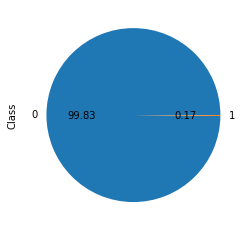

In [21]:
print("The Distributions of Class")
y.value_counts().plot.pie(autopct='%.2f')

Text(0.5, 1.0, 'Under-sampling')

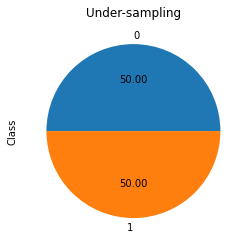

In [22]:
rus = RandomUnderSampler(sampling_strategy=1)
x_rus, y_rus = rus.fit_resample(X, y)
ax = y_rus.value_counts().plot.pie(autopct='%.2f')
ax.set_title("Under-sampling")

In [25]:
print("The value counts after under-sampling")
print(y_rus.value_counts())

The value counts after under-sampling
0    492
1    492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Over-sampling')

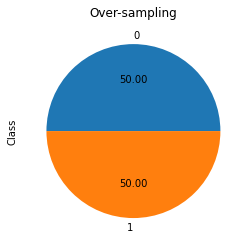

In [28]:
ros = RandomOverSampler(sampling_strategy="not majority")
x_ros, y_ros = ros.fit_resample(X, y)
ax = y_ros.value_counts().plot.pie(autopct='%.2f')
ax.set_title("Over-sampling")


In [29]:
print("The value counts after over-sampling")
print(y_ros.value_counts())

The value counts after over-sampling
0    284315
1    284315
Name: Class, dtype: int64
